# All about Support Vector Machines

In [1]:
import numpy as np

from sklearn import datasets, linear_model, metrics, model_selection
from sklearn.preprocessing import StandardScaler

# import image loading helper
from IPython.display import Image

import warnings

import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore", category=FutureWarning)

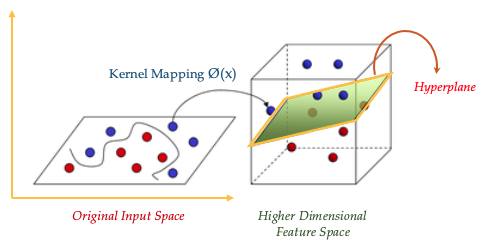

In [2]:
Image(filename='../images/svm.png', width=500)

_Support Vector Machine_ is one of the most well known popular machine learning algorithm falling under the categpry of Supervised machine learning method used for _regression_ and _classification_ tasks. Generally, it's more used as a classifier, so we shall base our discussion on classification.

It shares some similarities with the `Perceptron` model, so may be considered as an extension to the same. Support vector machine is generally considered mathematically quite difficult to grasp, but still it is considered to be the most performant off-the-shelf supervised machine learning algorithm. It can provide pretty fast results with tuning much of the unerlying machinery.

## Some basics

In order to understand an `SVM` there are a few technical terms with plane geometrical importance which needs to be unserstood. Here are some of the terms which we will be frequently referring to while discussing the _SVM_.

- **Point, Line, Plane and Solid**:

    - A Point has no dimensions, only position 
    - A Line is one-dimensional 
    - A Plane is two dimensional (2D) 
    - A Solid is three-dimensional (3D)

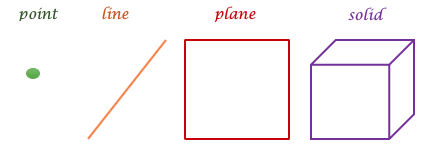

In [3]:
Image(filename='../images/shapes.png', width=500)

- **Hyperplanes**:

Hyperplanes are linear decision surfaces that split the space into two parts. They help classifying the data points in the sense that data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features and consists of one dimension less than the number of features.

Here is how we can relate thie with the earlier shapes:
(a) if the number if input features is 1, then the hyperplane is just a point.
(b) if the number of input features is 2, then the hyperplane is just a line.
(c) if the number of input features is 3, then the hyperplane becomes a two-dimensional plane. 

It becomes a little complex to imagine when the number of features exceeds 3.

- **Support Vectors**:

_Support Vectors_ are the data points which are closer to the hyperplane and influencing the orientation and position of the hyperplane. Obviously these are the data points which are most difficult to classify.

- **Margin**:

_Margin_ is the distance between nearest data points belonging to `2` different classes.

## Some history about SVM's and their real life usage

Support vector machine(s) are the result of work done by several people over many years. Much of the initial research on SVM's happened around _1960 to 1970_ after the original algorithm proposed by *Vapnik and Lerner* in _1963_. Here is a brief history of svm in chronological order.

- 1963: Vapnik and Lerner introduce the Generalized Portrait algorithm (the algorithm implemented by support vector machines is a nonlinear generalization of the Generalized Portrait algorithm).
- 1964: Vapnik and Chervonenkis further develop the Generalized Portrait algorithm.
- 1979: Duda and Hart discuss large margin hyperplanes in the input space.
- 1992: SVMs close to their current form were first introduced with a paper at the COLT 1992 conference (Boser, Guyon and Vapnik 1992).

More information about SVM's in general can be found at [svms.org!](http://svms.org)

In the real world, SVM's have been successfully used in the classification of three main areas:

* Text categorization (eg. classificattion of news stories)
* Image recognition (eg. hand written digit recognition) and
* Bioinformatics (eg. cancer tissue samples)

## Pros and Cons of SVM

Support vector machine is predominantly a binary classification algorithm, though extensions of the basic SVM algorithm may be applied to solve clustering & regression as well.

Here are some of the major plusses and minuses of the SVM model.

- Pros:

    - SVM provides a clear margin of separation and works really well for both linearly separable and inseparable data.
    - SVM is effective in high dimensional spaces, which means that it's quite efficient when data are of higher dimension with pretty large number of features.
    - It is especially effective for the classification problems where the number of dimensions are higher than a number of samples. This means if you have few data but the number of features is very high, you can depend on SVM.
    - It is memory efficient as it only uses a subset of training points (_support vectors_) in the decision function
    
- Cons:

    - SVM does not perform well when the number of features is much greater than the number of samples
    - It's performance degrades when the dataset contains more noise i.e., svm performs poorly when data is not properly separated and target classes overlap.

## Some insight into the SVM's

The basic idea behind the Support Vector Machine (`SVM's`) is to find a hyperplane which would separate the d-dimensional data perfectly into its two classes. But, in general real data is seldom linearly separable and for such cases **SVM's** introduce the notion of a *kernel induced feature space* which casts the data into a higher dimensional space where the data is separable.

Typically, this kind of casting into higher dimensional space would introduce some computational problems as well as overfitting. The key insight used in _SVM's_ is that the higher dimensional space doesn't need to be dealt with directly (it turns out, only the formula for dot product in that space is required), thus eliminating the concerns. Furthermore unlike other learning methods like neural networks, for which there is no measure, in case of `svm's` the VC-dimension (which is a measure of a system’s likelihood to perform well on
unseen data) `svm's` may be explicitly calculated.

Overall, `SVM’s` are quite intuitive, theoretically well-founded, and have shown to be practically successful. `SVM’s` have also been extended to solve regression tasks (where the system is trained to output a numerical value, rather than simple "yes/no" classification).

## Some motivation

### Seperating the data with a line

Consider the below datapoints on a 2 dimensional plane in $R^2$.

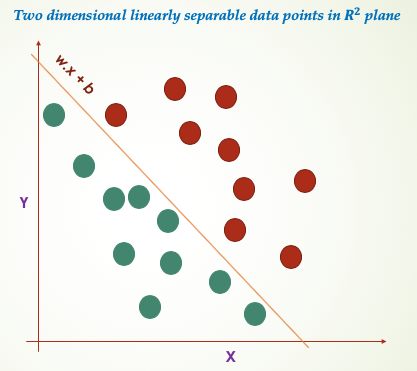

In [4]:
Image(filename='../images/svm1.png')

- What would be an intuitive way to seperate these two data points in the 2D plane ?

- Intuitively, we would also like to have the margin as large as possible

### Seperating the data with a plane

In case if the two classes of data points are not linearly seperable, we have to think about seperating the data points in much higher planes rather than simply in the 2D with a line, which is where _planes_ come into the picture.

Consider for instance the data points shown on the left below. Clearly, they are not lineary seperable and with a simple visual inspection, other than drawing some random curved function, it's not possible to seperate the two categories of points clearly.

So, imagine that both the points have certain mass and one is lighter than the other. With this kind of perception, the heavier points will all go down and the lighter points will stay up clearly giving us a plane to seperate the two categories of points. The process involved in such kind of seperation is what is famously called *Kernel Trick* as depcited below.

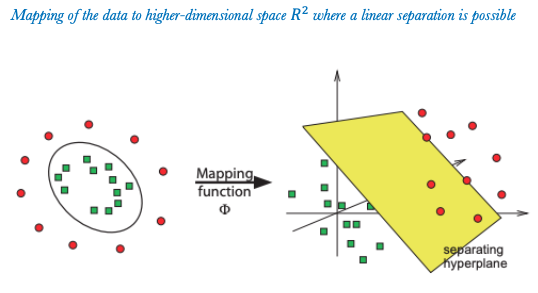

In [5]:
Image(filename='../images/svm2.png')

The plane (yellow portion) which is often referred to as the `Optimal Seperating Hyperplane` (**OSH**) may be determined exactly if a linear seperation of the data exists. The equation of such a hyperplane will only contain the coordinates of data points which are closest to it and those data points _support the plane_ and are hence called **Support Vectors**. From the hyperplane we can derive a decision function which would allows us to classify new data points
with unknown class label(s).

To separate the two classes of data points (using the yellow colored plane as shown) there could be many possible hyperplanes which can be chosen. The objective of **SVM** is to find such a plane which has the maximum margin, i.e., the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that the future data points can be classified with more confidence. The below figure shows a simple toy example with the separating plane

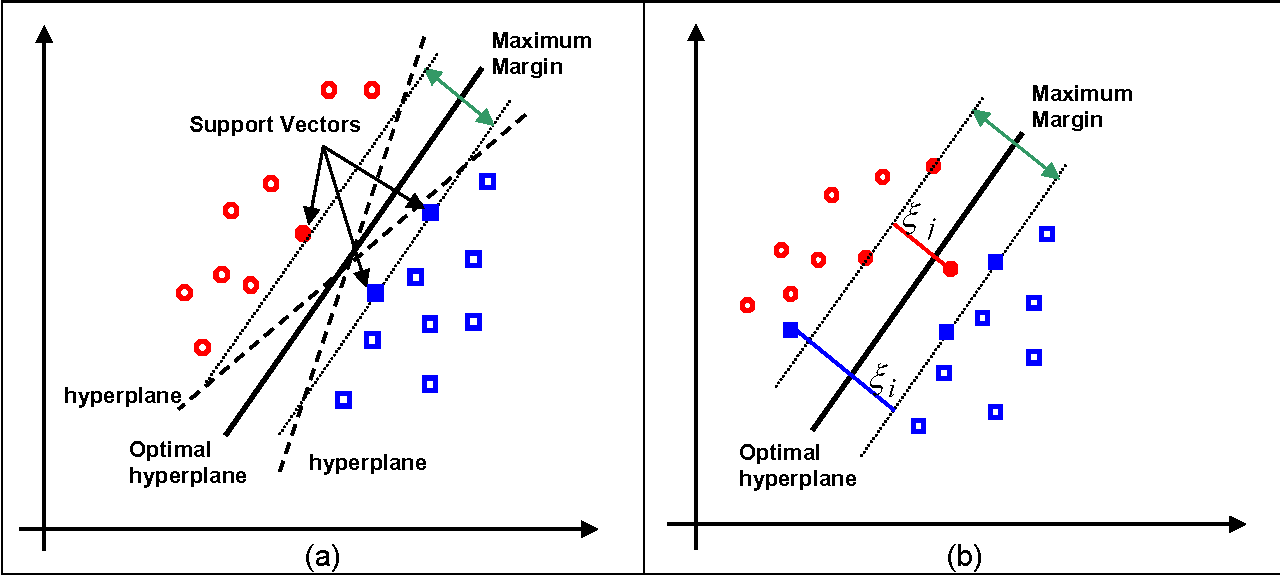

In [6]:
Image(filename='../images/svm3.png')

### Optimal Separating Hyperplane (some insight)

As discussed earlier when all samples as correctly classified, there can be multiple hyperplanes possible but we prefer the situation where the datapoint or sample can be as far from the decision boundary as possible and there can only be one such plane called as the _Optimal Separating Hyperplane_.

The concept of `margin` is introduced in order to measure the distance from data samples to the separating hyperplane. The optimal classifier is the one with the largest margin. Such a plane is arrived using a mathematical concept called as _Maximum margin linear classifier_ as depicted below.

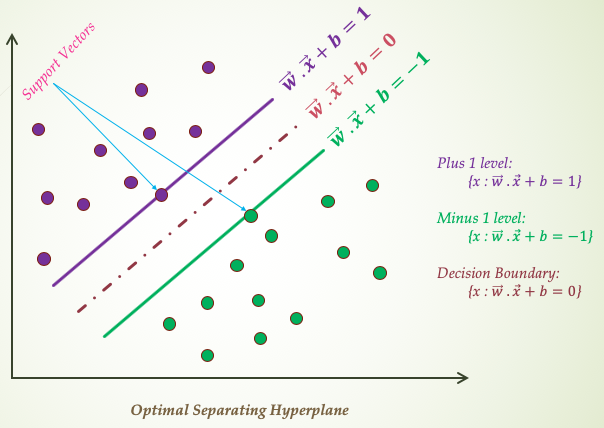

In [7]:
Image(filename='../images/osh.png')

Here are some of the important concepts with respect to the optimal classifier.

- Margin: The width of the band in which the decision boundary can move (in the direction of its normal vector) without touching any data point.

- Support Vectors:
    - All data points x lying at the plus 1 level or minus 1 level.
    - Only these points influence the decision boundary!
    
- Why do we need to maximize the margin
    - Intuitively, it is safe.
    - If we make a small error in estimating the boundary, the classification will likely stay correct.
    - The model is invariant with respect to the training set changes, except the changes of support vectors.
    - There are sound theoretical results (based on VC dimension) that having a maximum margin classifier is good.
    - Maximal margin works well in practice.

## The Kernel Trick

SVM algorithms are implemented using a kernel which is a way of transforming an input data space into the required form and Kernel trick helps to build a more accurate classifier. SVM's employ a technique called the _kernel trick_, where in, the kernel takes a lower dimensional input space and transforms the same into a higher dimensional space. Mathematically, it converts non-separable problem into a separable problem by adding more dimension(s) to it. The technique is most useful in non-linearly separable problem(s). 

There are various kernel(s) in practice, but the below ones are widely used:

1. **Linear Kernel**: A Linear kernel is nothing more than a simple dot product for any two given observations.
    Consider a mapping function $\phi$ which would allow for a linear separation in the so called feature space $\mathbb H$. Solving the equations for the _Optimal Separating Hyperplane_ in the hyperspace, we can observe that all formulae depend solely on the data through dot products in space $\mathbb H$, i.e., on functions of the form $\phi(x_i).\phi(x_j)$.

    In fact `Kernel` is a way of computing the dot product of two vectors $\mathbf x$ and $\mathbf y$ in some (possibly higher dimensional) feature space, which is why kernel functions are sometimes also called _**generalized dot product**_.

    This would encourage us to define a function `k` such that,

    \begin{equation*}
    k(x_i, x_j) = \phi(x_i).\phi(x_j) \\
    where \\
    x_i, x_j \in X, \phi: X \rightarrow \mathbb H \\
    where \ \mathbb H\ is\ the\ feature\ space
    \end{equation*}

    and using it as a similarity measure for $x_i$ and $x_j$ without explicitly knowing $\phi$ nor the dimension of $\mathbb H$.
   
    This indicates that we do not need to know what the feature space $\mathbb H$ would actually look like. We only need the kernel function $\phi$ which returns the measure of similarity. For calculating the equation of the **OSH** we need some knowledge on *vector geometry* and *Lagrange multipliers*.


2. **Polynomial kernel**: A polynomial kernel is a more generic form of the linear kernel. A polynomial curve can distinguish a complex curve or a non-linear input space. Polynomial kernels are quite popular in image processing.

    $k(\overrightarrow{x_i}, \overrightarrow{x_j}) = (\overrightarrow{x_i}.\overrightarrow{x_j} + 1)^d$
    
    where `d` is the degree of the polynomial. `d=1` is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.
    

3. **Gaussian kernel**: It is a general-purpose kernel, used when there is no prior knowledge about the data. It's equation is as defined below:

    $\mathbb{K}(x, y) = exp\begin{pmatrix}-\gamma\|x_i - x_j\|^2\end{pmatrix}$


4. **Gaussian radial basis function (RBF)**: The Radial basis function is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space. It is a general-purpose kernel, used when there is no prior knowledge about the data. It's equation is

    $\mathbb{K}(x_i, x_j) = exp\begin{pmatrix}-\gamma\frac{\|x_i - x_j\|}{2\sigma^2}\end{pmatrix}$
    
    The value of $\gamma$ ranges from `0` to `1`. As the value of $\gamma$ increases, the model runs into overfitting. The value needs to be specified manually into the algorithm and a value of $\gamma=0.1$ is generally considered as a good default value.


## The Hyperplane

An thorough understanding of the _Hyperplane_ is very much needed to understand the inner working details of a **SVM**. Here is a simple plot of a hyperplane in $\mathbb R^3$ defined by a point $\mathbb P_0$ and a perpendicular vector to the plane $\overrightarrow{w}$ at that point.

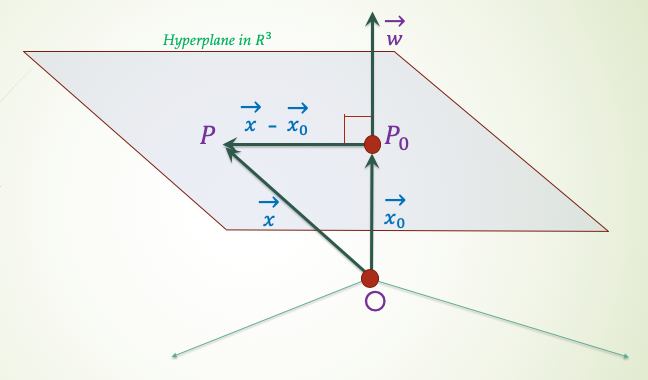

In [8]:
Image(filename='../images/svm4.png')

### Derivation of the equation of hyperplane

Define two vectors $\overrightarrow{x_0}$ = $\overrightarrow{OP_0}$ and $\overrightarrow{x}$ = $\overrightarrow{OP}$, where $\mathbb P$ is an arbitrary point on a _**Hyperplane**_.

We need to consider the equation of dot product of vectors in a plane to proceed further. If $\overrightarrow{a}$ and $\overrightarrow{b}$ are any two vectors in a plane separated by an angle $\theta$, then their vector dot product may be representated as below:

$\overrightarrow{a}.\overrightarrow{b}$ = $|a||b|cos{\theta}$

and for two vectors $\overrightarrow{a} = \left[a_0,a_1,a_2,…,a_n \right]$ and $\overrightarrow{b} = \left[b_0,b_1,b_2,…,b_n \right]$, the dot product is defined as

$\overrightarrow{a}.\overrightarrow{b} = a_0b_0 + a_1b_1 + … + a_nb_n$
$\Rightarrow \sum_{i=1}^N a_ib_i$

Using the above knowledge of dot product, A condition for the point $\mathbb P$ to be on the plane is that the vector $\overrightarrow{x} - \overrightarrow{x_0}$ is perpendicular to the vector $\overrightarrow{w}$ as shown below:

$\overrightarrow{w}.(\overrightarrow{x} - \overrightarrow{x_0}) = 0$ or

$\overrightarrow{w}.\overrightarrow{x} - \overrightarrow{w}.\overrightarrow{x_0} = 0$

If we consider the bias `b` as $b = - \overrightarrow{w}.\overrightarrow{x_0}$, then it becomes

$\overrightarrow{w}.\overrightarrow{x} + b = 0$

The above equations also hold for $\mathbb R^n$ when `n > 3`.

- An example

let $\overrightarrow{w}$ = (3, -1, 5) and
    $\overrightarrow{P_0}$ = (0, 1, -4)
then based on the hyperplane defined earlier $\overrightarrow{w}.\overrightarrow{x} + b = 0$, we can have the equation as below:

bias, `b` = -$\overrightarrow{w}.\overrightarrow{x}$
$\Rightarrow \overrightarrow{w}.\overrightarrow{x} + 20 = 0$

If the bias `b` changes, the hyperplane will move either along the direction of $\overrightarrow{w}$ or opposite to $\overrightarrow{w}$ accordingly as either `b` is positive or negative, thus giving us parallel hyperplanes as shown below.

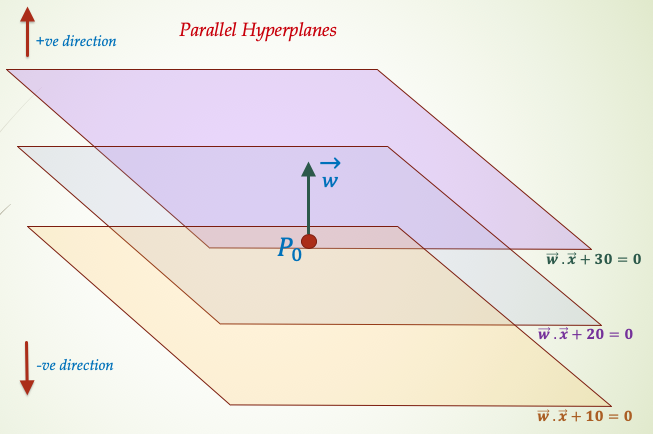

In [9]:
Image(filename='../images/svm5.png')

### Distance between two parallel hyperplanes

Consider two parallel hyperplanes $\overrightarrow{w}.\overrightarrow{x} + b_1 = 0$ and $\overrightarrow{w}.\overrightarrow{x} + b_2 = 0$ as shown below. The next section will show the derivation of the distance between the two hyperplanes.

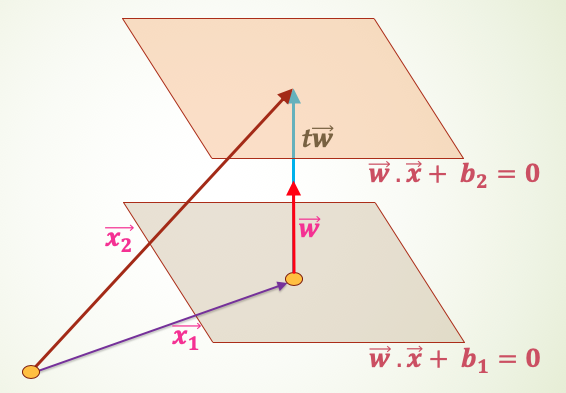

In [10]:
Image(filename='../images/svm6.png')

The distance between the two parallel hyperplanes $\overrightarrow{w}.\overrightarrow{x} + b_1 = 0$ and $\overrightarrow{w}.\overrightarrow{x} + b_2 = 0$ is equal to $\mathbb D = \frac{|b_1 - b_2|}{\|\overrightarrow{w}\|}$.

#### Derivation:

A vector parallel to the weight vector $\overrightarrow{w}$ will be equal to $t\overrightarrow{w}$ where `t` = some constant.

From the figure, we can deduce the following:


$ \overrightarrow{x_2} = \overrightarrow{x_1} + t\overrightarrow{w} $

$ Distance,\ \mathbb D = \|t\overrightarrow{w}\| = |t|\|\overrightarrow{w}\| $

$ substituting\ \overrightarrow{x_2} = \overrightarrow{x_1} + t\overrightarrow{w}\ in $

$ \overrightarrow{w}.\overrightarrow{x_2} + b_2 = 0 $

$ \overrightarrow{w}.\overrightarrow{x_1} + t\|\overrightarrow{w}\|^2 + b_2 = 0 $

$ (\overrightarrow{w}.\overrightarrow{x_1} + b_1) - b_1 + t\|\overrightarrow{w}\|^2 + b_2 = 0 $

$ because\ \overrightarrow{w}.\overrightarrow{x_1} + b_1 = 0\ we\ may\ write, $

$ -b_1 + t\|\overrightarrow{w}\|^2 + b_2 = 0 $

$ t = \frac{(b_1 - b_2)}{\|\overrightarrow{w}\|^2 } $

$ \Rightarrow \mathbb D = |t|\|\overrightarrow{w}\| = \frac{|b_1 - b_2|}{\|\overrightarrow{w}\|} $

#### Margin size

Consider the equations of planes with respect to the _Optimal Separating Hyperplane_ that we discussed earlier as below:

- Plus 1 level plane

$ \overrightarrow{w}.\overrightarrow{x_2} + b = 1 $

- Decision Boundary

$ \overrightarrow{w}.\overrightarrow{x_2} + b = 0 $

- Minus 1 level plane

$ \overrightarrow{w}.\overrightarrow{x_2} + b = -1 $

Using the equation of _Distance between hyperplanes_ as derived earlier, we can calculate the margin size as below

Margin size, `M` = $ \frac{(b_1 - b_2)}{\|\overrightarrow{w}\|}$

$\Rightarrow M = \frac{1 - (-1)}{\|\overrightarrow{w}\|} = \frac{2}{\|\overrightarrow{w}\|}$

#### Representation

Given training data:

$\overrightarrow{x_1}, \overrightarrow{x_2},...,\overrightarrow{x_n} \in \mathbb R^n$ and

$y_1, y_2,…, y_n \in \{-1, +1\}$

The goal is to separate the negative instances from the positive ones. As discusses earlier, the additional task after the separation is to find a plane with maximum margin of separation, which is depicted pictorially as below.

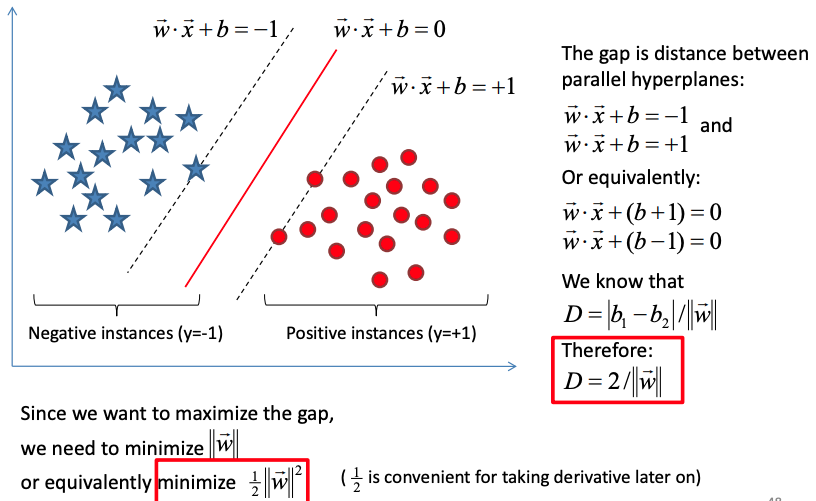

In [11]:
Image(filename='../images/svm7.png')

#### Maximizing the Margin

If we want to maximize the margin `M` = $\frac{2}{\|\overrightarrow{w}\|}$, then we have to minimize the $\|\overrightarrow{w}\|$ (or equivalently minimize $\|w\|^2$) subject to the constraints ensuring correct classification of the training set. This kind of optimization problem can be formulated as a **Quadratic Programing (QP)** task which is a special optimization problem, the function to optimize (_objective_) is quadratic, subject to linear constraints. _**QP**_ is a well studied class of optimization algorithms to maximize a quadratic function of some real valued variables subject to some linear constraints.

Convex `QP` problems have convex objective functions. Such problems can be solved easily and efficiently by greedy algorithms (because every local minimum is a global minimum).

If we apply the constraints to the plot of data points we considered earlier, then we can further as depicted below and explained further.

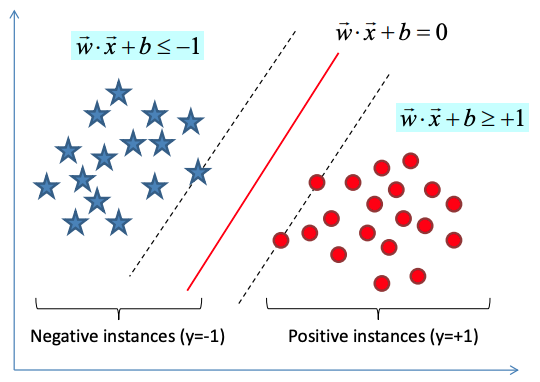

In [12]:
Image(filename='../images/svm8.png')

> **Contraints**
>
> We need to impose constraints that all instances are correctly classified (_no data point falls between the positive and negative hyperplanes_). As per the plot shown above, we may consider the below:
>
> $\overrightarrow{w}.\overrightarrow{x}_i + b \leq -1\ if\ y_i = -1$
>
> $\overrightarrow{w}.\overrightarrow{x}_i + b \geq +1\ if\ y_i = +1$
>
> $\forall \ i = 1,2,...,n$, where **n** is the number of samples in our dataset for an observation $(x_i, y_i)$.
>
> These two equations basically indicate that all negative samples should fall on one side of the negative hyperplane, whereas all positive samples should fall behind the positive hyperplane, which may be combined and equivalently represented as below formulation:
>
> $y_i.(\overrightarrow{w}.\overrightarrow{x_i} + b) \geq 1, \forall \ i$
>
> In essense, we would like to maximize the margin width, M = $\frac{2}{\|\overrightarrow{w}\|}$ or
>
> minimize the resiprocal term $\frac{1}{2}\|\overrightarrow{w}\|^2$ 
>
> subject to the constraints $y_i.(\overrightarrow{w}.\overrightarrow{x_i} + b) \geq 1$ $\forall \ i = 1,2,...,n$. These may be solved using _Quadratic Programming_.
> 
> Then, given a new instance $x$, the classifier is $f(\overrightarrow{x}) = sign(\overrightarrow{w}.\overrightarrow{x} + b)$ or
>
> $f(\overrightarrow{x}, \overrightarrow{w}, b) = sign(\overrightarrow{w}.\overrightarrow{x} + b)$

#### SVM optimization problem

We can represent the _**SVM**_ optimization problem into two formulations:

1. Primal Formulation and
2. Dual Formulation


* **Primal Formulation**:

    The Primary QP task may be represented as

    * minimize $\|\overrightarrow{w}\|^2$ with respect to $\overrightarrow{w}_1, \overrightarrow{w}_2,...,\overrightarrow{w}_n$, subject to the constraint
    
    * $y_i(\overrightarrow{w}.x_i + b) \geq 1\ \forall\ i=1,2,…,n$


_**Note: $\|w\|^2 = \overrightarrow{w}.\overrightarrow{w}^T$**_

In essence, here is how the `Primal Formulation` can be depicted.

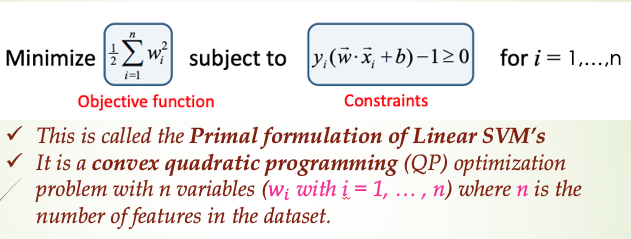

In [13]:
Image(filename='../images/svm9.png')

The objective function, $\frac{1}{2}\|w\|^2 = \frac{1}{2}(w_1^2 + w_2^2 +...+ w_n^2)$

is differentiable; furthermore $\nabla(\frac{1}{2}\|w\|^2) = w$ showing that the function $\frac{1}{2}\|w\|^2$ is a `convex` function of **w**.


* **Dual Formulation**:

    The previous problem of _Primal formulation_ may be re-casted into the so-called **Dual form**  giving rise to the *Dual Formulation of Linear SVM's*. This kind of transformation from **Primal problem** to **Dual problem** is done because, even though the _Primal problem_ can be solved using _Quadratic Programming_, it is not ready to be _kernelized_ as it's dependence is not only on inner products between data vectors. The concept of **Lagrangian mltipliers** is used in the _Dual form_.

    It is also a convex quadratic programming problem, but with `n` variables ($\alpha_i\ \forall \ i=1,2,…,n$) where `n` is the number of samples.
    
    The dual QP task may be represented as
    
    * maximize $\sum_{i=1}^n{\alpha_i} - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_j(\overrightarrow{x_i}.\overrightarrow{x_j})$ 
    
    with respect to $\alpha_1, \alpha_2,…,\alpha_n$
    
    subject to the condition $\alpha_i \geq 0$ and $\sum_{i=1}^n\alpha_iy_i = 0$
    
In essence, here is how the `Dual Formulation` can be depicted.

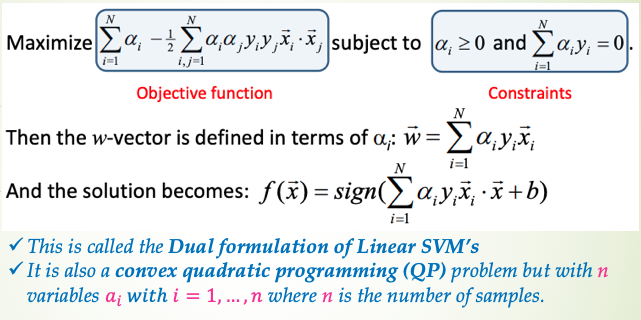

In [14]:
Image(filename='../images/svm10.png')

### More Insight into the _QP_ reformulation task and arriving at _OSH_

In arriving at the above kind of equations by solving the _QP_, there is a deep level of Mathematics involved more specifically related to **Lagrangian Multipliers** and **Karush Kuht Tucker Conditions (KKT)**.

There are 2 reasons for reformulating the **QP** task as a **Lagrangian formulation**:

(i) The constraints will be replaced by constraints on the Lagrange multipliers, which are easier to handle.
(ii) The training data will end up only appearing as dot products between vectors. This is crucial for the kernel trick to work

Finding the _Optimal Separating Hyperplane_ is identical to solving a Convex Quadratic Problem. We first reformulate the _QP_ task into a _Lagrangian formulation_ by introducing positive _`Lagrange multipliers`_ $\alpha_i \forall \ i=1,2,...,n$, one for each of the inequality constraints. The rule is that for constraints of the form $c_i \geq 0$, the constraint equations are multiplied by _positive Lagrange multipliers_ and then subtracted from the object function, to form the Lagrangian. For equality constraints, the Lagrange
multipliers are unconstrained, giving us the below _**Primal**_ Lagrangian form:

$L_P = \frac{1}{2}\|\overrightarrow{w}\|^2 - \sum_{i=1}^n\alpha_i\{y_i(w.\overrightarrow{x_i} + b) - 1\}$

or equivalently,

$L_P = \frac{1}{2}|\overrightarrow{w}.\overrightarrow{w}^T| - \sum_{i=1}^n\alpha_i\{y_i(\overrightarrow{w}.\overrightarrow{x_i} + b) - 1\}$

because $\|\overrightarrow{w}\|^2 = |\overrightarrow{w}.\overrightarrow{w}^T|$

$\Rightarrow L(w, b, \alpha) = \frac{1}{2}\|\overrightarrow{w}\|^2 - \sum_{i=1}^n\alpha_i\{y_i(\overrightarrow{w}.\overrightarrow{x_i} + b) - 1\}$

$\Rightarrow L(w, b, \alpha) = \frac{1}{2}\|\overrightarrow{w}\|^2 - \sum_{i=1}^n\alpha_i\{y_i(\overrightarrow{w}.\overrightarrow{x_i} + b)\} + \sum_{i}^n\alpha_i$

$\Rightarrow L(w, b, \alpha) = \frac{1}{2}\|\overrightarrow{w}\|^2 - \sum_{i=1}^n\alpha_iy_i\overrightarrow{w}\overrightarrow{x_i} - \sum_{i}^n\alpha_iy_ib + \sum_{i}^n\alpha_i$ or

$\Rightarrow L_P = \frac{1}{2}\|\overrightarrow{w}\|^2 - \sum_{i=1}^n\alpha_iy_i\overrightarrow{w}\overrightarrow{x_i} - \sum_{i}^n\alpha_iy_ib + \sum_{i}^n\alpha_i$

For an optimal solution of the primal problem, the equations should satisfy the _**KKT**_ conditions. The Karush-Kuhn-Tucker (KKT) conditions play a central role in both the theory and
practice of constrained optimization. 

We must now minimize $L_P$ with respect to `w`, `b` and simultaneously require that the
derivatives of $L_P$ with respect to all the $\alpha_i$ vanish, all subject to the constraints $\alpha_i \geq 0$ (let’s call this particular set of constraints C1). Now this is a convex quadratic programming problem, since the objective function is itself convex, and those points which satisfy the constraints also form a convex set (any linear constraint defines a convex set, and a set of `n` simultaneous linear constraints defines the intersection of `n` convex sets, which is also a convex set). This means that we can equivalently solve the following _**Dual**_ problem:

maximize $L_P$ , subject to the constraints that the gradient of $L_P$ with respect to _w and b_ vanish, and subject also to the constraints that the $\alpha_i \geq 0$ (let’s call that particular set of constraints C2). This particular _dual formulation_ of the problem is called the _Wolfe dual (Fletcher, 1987)_. It has the property that the maximum of $L_P$ , subject to constraints C2, occurs at the same values of the _w, b and $\alpha$_, as the minimum of $L_P$ , subject to constraints C1.


The `KKT` conditions may be stated as below:

_Condition-1_:

$\frac{\partial L}{\partial w} = \frac{1}{2}(2|\overrightarrow{w}|) - \sum_{i=1}^n\alpha_iy_i\overrightarrow{x_i} = 0  \ \forall \ i=1,2,…,n$

$\Rightarrow \frac{\partial L}{\partial w} = \overrightarrow{w} - \sum_{i=1}^n\alpha_iy_i\overrightarrow{x_i} = 0$

$\Rightarrow \overrightarrow{w} = \sum_{i=1}^n\alpha_iy_i\overrightarrow{x_i}$

> With the value of weight vector calculated as
>
> $\overrightarrow{w} = \sum_{i=1}^n\alpha_iy_i\overrightarrow{x_i}$ from above, we can arrive at the transpose of the same as
>
> $\overrightarrow{w}^T = \sum_{j=1}^n\alpha_jy_j\overrightarrow{x_j}$
>
> and furthermore with $\|\overrightarrow{w}\|^2 = |\overrightarrow{w}.\overrightarrow{w}^T|$, we get
>
> $|\overrightarrow{w}.\overrightarrow{w}^T| = \sum_{i=1}^n\alpha_iy_i\overrightarrow{x_i}\sum_{j=1}^n\alpha_jy_j\overrightarrow{x_j}$
>
> $\Rightarrow \overrightarrow{w}.\overrightarrow{w}^T = \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_j(\overrightarrow{x_i}.\overrightarrow{x_j})$

_Condition-2:_

$\frac{\partial L}{\partial b} = \alpha_iy_i = 0$

Plugging these equalities (_Condition-1 & Condition-2_) back into the _primal formulation $L_P$_ gives us the dual formulation $L_D$, which now only contains $\alpha$ and no $w$

$L_D = \sum_{i}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_j(x_i.x_j)$

## Handling the case of Non-Linearly separable data points using _Slack Variables_.

The earlier algorithm which was solved for the linearly separable data, when applied to a non-linearly separable data, will find no feasible solution: this is evident from the objective function (i.e., the dual lagrangian) growing arbitrarily large.

So, how do we handle the case of non-separable data as it cannot satisfy the constraints $y_i(\overrightarrow{w}.\overrightarrow{x_i} + b) \geq 1$ for some data points? What can be done to extend these ideas to handle the non-separable data?

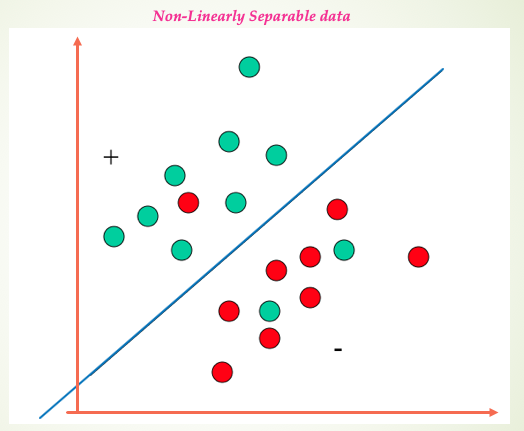

In [15]:
Image(filename='../images/svm11.png')

Let's revisit the earlier equations we consider for a separable case:

> $\overrightarrow{w}.\overrightarrow{x_i} + b \leq -1\ if\ y_i = -1$
>
> $\overrightarrow{w}.\overrightarrow{x_i} + b \geq +1\ if\ y_i = +1$
>
> $\forall \ i = 1,2,...,n$, where **n** is the number of samples in our dataset.

We would like to relax the above constraints, but only when necessary, that is we would like to introduce a further cost (i.e., an increase of the primal objective function) for doing so. This can be done by introducing positive **Slack Variables $\xi_i \ \forall \ i = 1,2,...,n$**  in the constraints.

The _slack variable_ was introduced by _Vladimir Vapnik_ in 1995 which led to the so-called **Soft Margin classification**. The motivation for introducing the slack variable $xi$ was that the linear constraints need to be relaxed for non-linearly separable datain in order to allow for the convergence of optimization in the presence of misclassifications, under appropriate cost penalization.

The constraints after the addition of a positive slack variable, will then become:

> $\overrightarrow{w}.\overrightarrow{x_i} + b \leq -1 - \xi_i \ for\ y_i = -1$
>
> $\overrightarrow{w}.\overrightarrow{x_i} + b \geq +1 + \xi_i \ for\ y_i = +1$
>
> $\xi_i \geq 0 \ \forall \ i = 1,2,...,n$, where **n** is the number of samples in our dataset.
>
> In order to allow for misclassifications, we replace the constraints as below:
>
> $y_i(\overrightarrow{w}.\overrightarrow{x_i} + b) \geq 1$
>
> $y_i(\overrightarrow{w}.\overrightarrow{x_i} + b) \geq 1 - \xi_i$
>
> $\xi_i \geq 0$ are called the _Slack Variables_
>

The above model provides the below two improvements:

- Allow for errors

- Non Linear models

Thus for an error to occur, the corresponding $\xi_i$ must exceed _unity_, so $\sum_{i=0}^n\xi_i$ is an upper bound on the number of training errors. Hence a natural way to assign an extra cost for errors is to change the objective function to be minimized from $\|w\|^2$ to $\|w\|^2 + \mathbb{C}(\sum_{i}^n\xi_i)^k$

where the parameter $\mathbb{C}$ which is a _Regularization parameter_ controls the trade-off between minimizing the classification error and maximizing the margin of separation. $\mathbb{C}$ has to be chosen by the user, reflecting the confidence on the training sample.

A small value of $\mathbb{C}$ (i.e. < 1) significantly limits the influence of error points (or outliers), whereas if $\mathbb{C}$ is chosen to be very large (or infinite) then the _soft margin_ approach becomes identical to the _maximal margin_ classifier. 

A larger value of $\mathbb{C}$ assigns higher penalty to errors. As it stands, this is a _Convex_ programming problem for any positive integer **k; for k = 2 & k = 1** it is also a quadratic problem and the choise **k = 1** has the additional advantage of neither $\xi_i$, nor their _Lagrangian_ multipliers, appear in the _Wolfe dual problem_ which becomes

$L_D = \sum_{i}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_j(\overrightarrow{x_i}.\overrightarrow{x_j})$

subject to:

$0 \leq \alpha_i \leq \mathbb{C}$,

$\sum_{i=1}^n\alpha_iy_i = 0$

The solution is again given by:

$\overrightarrow{w} = \sum_{i=1}^n\alpha_iy_i\overrightarrow{x_i}$

where _n_ is the number of support vectors. Thus the only difference from the optimal hyperplane case is that the $\alpha_i$ now has an upper bound of $\mathbb{C}$. This situation can be represented by the below figure.

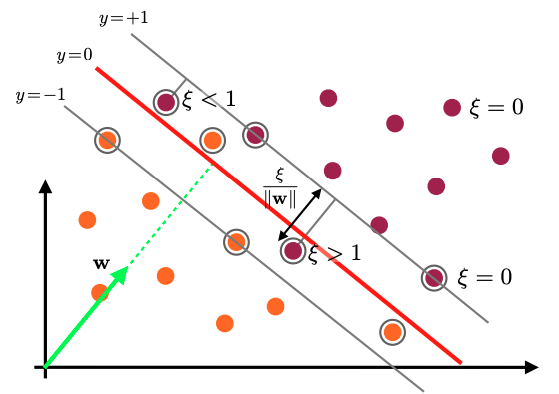

In [16]:
Image(filename='../images/svm12.png')

From the figure, the below can be inferred

- The relationship $\xi_i = |y_i - f(x_i)|$ implies that the points on the boundary have $\xi_i = 1$

- Misclassified points receive $\xi_i > 1$

- The set of constraints describing our training data $(x_i, y_i)$ is now:
>
> $wx_i + b \geq +1 - \xi_i \ for \ y_i = +1$
>
> $wx_i + b \leq -1 + \xi_i \ for \ y_i = -1$

- Points with $\xi_i > 0$ which violate the margin are called **Non margin support vectors**. They are also considered support vectors.


#### Primal form

We need the **Karush-Kuhn-Tucker** conditions for the primal problem. The primal lagrangian is

$L_P = \frac{1}{2}\|w\|^2 + \mathbb{C}\sum_{i=1}^n\xi_i - \sum_{i=1}^n\alpha_i\{y_i(w.x_i + b) - 1 + \xi_i\} - \sum_{i=1}^n\mu_i\xi_i$

where the $\mu_i$ is the Lagrangian multiplier introduced to enforce positivity of the $\xi_i$. 

The **KKT** conditions for the primal problem are therefore

1. $\frac{\partial{L_P}}{\partial{w}} = \overrightarrow{w} - \sum_{i=1}^n\alpha_iy_i\overrightarrow{x_i} = 0$

2. $\frac{\partial{L_P}}{\partial{b}} = -\sum_{i=1}^n\alpha_iy_i = 0$

3. $\frac{\partial{L_P}}{\partial{\xi_i}} = \mathbb{C} - \alpha_i - \mu_i = 0$

    $\Rightarrow \alpha_i + \mu_i = \mathbb{C}$

    $\Rightarrow \alpha_i \leq \mathbb{C}$

4. Constraint-1
    
    $y_i(\overrightarrow{w}.\overrightarrow{x_i} + b) - 1 + \xi_i \geq 0$

5. Constraint-2
    
    $\xi_i \geq 0$

6. Multiplier condition-1 

    $\alpha_i \geq 0$

7. Multiplier condition-2 

    $\mu_i \geq 0$

8. Complementary slackness-1

    $\alpha_i\{y_i(\overrightarrow{w}.\overrightarrow{x_i} + b) - 1 + \xi_i\} = 0$

9. Complimentary slackness-2

    $\mu_i\xi_i = 0$

#### Dual form

Using the above in the _Primal form_, we can arrive at the _Dual form_ like earlier.

$L_D = \sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^ny_iy_j\alpha_i\alpha_j(\overrightarrow{x_i}.\overrightarrow{x_j})$

Again by considering that $\sum_{i=1}^ny_ialpha_i = 0$ and $\alpha_i \geq 0$, this is similar to the _Maximum Margin Classifier_ discussed earlier.

The only difference is the new constraints of $\alpha_i + \xi_i = \mathbb{C}$, where $\xi_i \geq 0$, hence $0 \leq \alpha_i \leq \mathbb{C}$. This implies that the value $\mathbb{C}$ sets an upper limit on the Lagrangian optimization variables $\alpha_i$.

So, essentially **Dual optimization** $L_D$ may be representated as

maximize $L_D = \sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^ny_iy_j\alpha_i\alpha_j(\overrightarrow{x_i}.\overrightarrow{x_j})$

subject to the constraints,

$\sum_{i=1}^n\alpha_iy_i = 0$ and

$0 \leq \alpha_i \leq \mathbb{C} \forall \ i$

## Demonstration using the Iris dataset

After loading the _iris_ dataset from scikit-learn, we will select the third column which represents petal length and the fourth column which represents petal width of flower samples. The classes are already converted to integer labels as below

- 0=Iris-Setosa,
- 1=Iris-Versicolor,
- 2=Iris-Virginica.

In [17]:
# load the iris flower dataset
iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

# print the class labels of flower dataset
print("Iris class labels: {}".format(np.unique(y)))
# list the feature names
print("iris feature names: {}".format(list(iris.feature_names)))
# list the target names
print("iris target names: {}".format(list(iris.target_names)))

# split the dataset into training and test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# print some data
print('\n# after splitting the data into training and testing #')
print(' count of labels in y:', np.bincount(y))
print(' count of labels in y_train:', np.bincount(y_train))
print(' count of labels in y_test:', np.bincount(y_test))

# standardizing and scaling the features by removing the mean
# and scaling to unit variance
scaler = StandardScaler()
# fit/compute the mean and std to be used for later scaling
scaler.fit(X_train)
# perform standardization by centering and scaling
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# now confirm that the scaled or standardized dataset is indeed
# cenetered at zero, with unit variance.
print('\n# checking scaled training dataset for unit variance #')
print(' mean centered at 0: ', X_train_std.mean(axis=0))
print(' std centered at 0: ', X_train_std.std(axis=0))
# combined training and test data standardized
X_combined_std = np.vstack((X_train_std, X_test_std))
# combined training and test data
y_combined = np.hstack((y_train, y_test))

Iris class labels: [0 1 2]
iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris target names: ['setosa', 'versicolor', 'virginica']

# after splitting the data into training and testing #
 count of labels in y: [50 50 50]
 count of labels in y_train: [35 35 35]
 count of labels in y_test: [15 15 15]

# checking scaled training dataset for unit variance #
 mean centered at 0:  [5.70971841e-17 7.19001578e-17]
 std centered at 0:  [1. 1.]


### Demonstrating the Maximum Margin Classification with SVM

The next couple of sections will demonstrate the _Maximum Margin Classifier_ using the python code. We will train an SVM model to classify the different categories flowers from `Iris` dataset.

In [18]:
# Some helper functions for plotting the data
def create_meshgrid(x, y, margin=1, step=0.02):
    """Create a numoy rectangular meshgrid out of an array of
    x values and an array of y values

    @ref https://stackoverflow.com/questions/36013063
                 /what-is-the-purpose-of-meshgrid-in-python-numpy

    :x: array-like point x
    :y: array-like point y
    :margin: (int) boundary
    :step: (float) stepping the values, default = 0.02

    Examples
    --------
    x = np.array([0, 1, 2, 3, 4])
    y = np.array([0, 1, 2, 3, 4])
    xx,yy=np.meshgrid(x,y)
    plt.plot(xx,yy, marker='.', color='k',linestyle='none')

    """
    x_min, x_max = x.min() - margin, x.max() + margin
    y_min, y_max = y.min() - margin, y.max() + margin
    # define the mesh grid, with xx and yy holding the grid of
    # points where the function will be evaluated
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    return xx, yy

# A helper for plotting the decision surface
def plot_classifier(X,
                    y,
                    classifier,
                    margin=1.0,
                    step_size=0.01,
                    alpha=0.8,
                    test_idx=None,
                    cmap=plt.cm.Paired):
    """Draw the datapoints and boundaries
    Parameters
    ----------
    x: {array-like}, shape = [n_samples, n_features]
    y: array-like, shape = [n_samples]
    margin: margin for the min and max
    step_size: float
    This is spacing between values. For any output out, this is the distance
    between two adjacent values, out[i+1] - out[i]
    alpha: float
    blending value to decide transparency - 0 (transparent) and 1 (opaque)
    test_idx: list
    cmap: object
    color map for the output colors of objects
    """
    # setup marker generator for plotting
    markers = ('s', 'o', 'x', '*', 'v')
    
    # setup and define a range for plotting the data
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = create_meshgrid(X0, X1, margin=margin, step=step_size)
    
    # compute the output of the classifier
    mesh = np.c_[xx.ravel(), yy.ravel()]
    mesh_output = classifier.predict(mesh)
    
    # reshape the array
    mesh_output = mesh_output.reshape(xx.shape)
    
    # draw and fill the contour lines
    plt.contourf(xx, yy, mesh_output, alpha=0.4, cmap=cmap)
    
    # now overlay the training coordinates over the plot
    # set boundaries
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks((np.arange(int(min(X[:, 0]) - 1), int(max(X[:, 0]) + 1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1]) - 1), int(max(X[:, 1]) + 1), 1.0)))
    
    # use a separate marker for each training label
    for (i, cl) in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=alpha,
            marker=markers[i],
            label=cl,
            edgecolors='purple')
        
    # for plotting and highlighting the test samples
    if test_idx:
        # x_test, y_test = X[test_idx, :], y[test_idx]
        x_test = X[test_idx, :]
        plt.scatter(
            x_test[:, 0],
            x_test[:, 1],
            c='',
            edgecolors='purple',
            alpha=alpha,
            linewidths=1,
            marker='o',
            s=100,
            label='Test Data')


SVM Linear Classifier - Training accuracy: 0.9524

SVM Linear Classifier - Testing accuracy: 0.9778


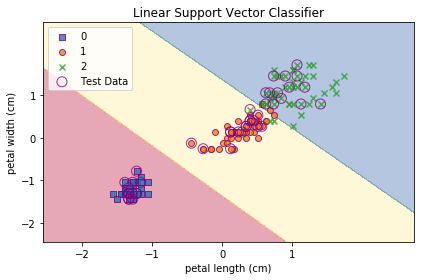

In [19]:
# import the Support Vector Classification from sklearn
from sklearn.svm import SVC


# create an instance of SVM and fit out the data.
# Important parameters for SVC
# C: SVM regularization parameter.
# kernel: It specifies the kernel type to be used in the algorithm.
#         It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’,
#         or a callable. The default value is ‘rbf’.
# degree: It is the degree of the polynomial kernel function (‘poly’)
#         and is ignored by all other kernels. The default value is 3.
# gamma: It is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’.
#        If gamma is ‘auto’, then 1/n_features will be used instead.
svm = SVC(kernel="linear", C=1.0, random_state=1)

# Fit the SVM model according to the given training data.
svm.fit(X_train_std, y_train)

# using the custom function defined earlier, plot the data
plot_classifier(
                X=X_combined_std,
                y=y_combined,
                classifier=svm,
                test_idx=range(105, 150),
                cmap=plt.cm.Spectral)

# predict class labels for samples in normalized X_train
y_predicted_train = svm.predict(X_train_std)
# print('\nSVM Training Prediction: {}'.format(y_predicted_train))
print("\nSVM Linear Classifier - Training accuracy:",round(metrics.accuracy_score(y_train,y_predicted_train),4))

# predict class labels for samples in normalized X_test
y_predicted_test = svm.predict(X_test_std)
# print('\nSVM Testing Prediction: {}'.format(y_predicted_test))
print("\nSVM Linear Classifier - Testing accuracy:",round(metrics.accuracy_score(y_test,y_predicted_test),4))

title = 'Linear Support Vector Classifier'
plt.title(title)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Alternate implementations of the SVM classifier in scikit-learn

For large datasets which are computationally demanding, the python's scikit-learn offers an alternate implementation through the **SGDClassifier** class which also supports online learning via the `partial_fit` method. The implementation of the `SGDClassifier` is similar to the _Stochastic gradient descent_.

In [20]:
# implementation of stochastic gradient descent version of the
# perceptron, logistic regression and svm
perceptron = linear_model.SGDClassifier(loss='perceptron', n_iter=1000)
logistic_regression = linear_model.SGDClassifier(loss='log', n_iter=1000)
svm = linear_model.SGDClassifier(loss='hinge', n_iter=1000)

### Classification of the non-linear problems using a kernel SVM

SVM's can be kernelzied in order to solve problems related to non-linear classification. In the next section, we will create a sample dataset to visualize a nonlinear classification problem. We will create a total of 200 samples with 100 each assigned to class labels `1` and `-1`. The below code after executing will produce a _XOR_ dataset with random noise.

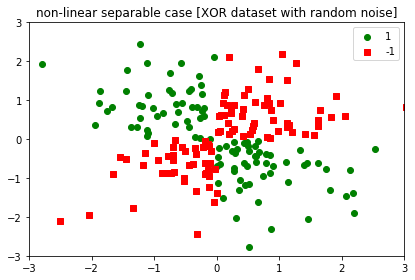

In [21]:
# create a random seed
np.random.seed(1)
# create 2 dimensional Guassian data matrix of 200 samples
X_xor = np.random.randn(200, 2)
# filter the values with boolean values from exclusive OR
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# replace true=1 and false=-1
y_xor = np.where(y_xor, 1, -1)

# scatter plot
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='g', marker='o', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

title = 'non-linear separable case [XOR dataset with random noise]'

plt.title(title)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From the plot above, it can be confirmed that it's not possible to separate the positive and negative samples cleanyly using a linear hyperplane as a decision boundary through the _linear logistic regression_ or a _linear SVM_.

So, we will apply kernel trick to create a nonlinear combination of the original features to cast them into a higher dimensional space using a mapping function $\phi$ where it becomes linearly separable.

Using a projection function of the following form we can transform a 2-dimensional dataset into a new 3-dimensional feature space, where the classes become linearly separable.

$\phi(x_1, x_2) = (z_1, z_2, z_3) = (x_1, x_2, x_1^2, x_2^2)$

One of the most widely used _kernel_ is the **Radial Basis Function (RBF)** or simply the **Gaussian Kernel** as under.

$\mathbb{K}(x_i, x_j) = exp\begin{pmatrix}-\gamma\frac{\|x_i - x_j\|}{2\sigma^2}\end{pmatrix}
$

This may be simplified to,

$\mathbb{K}(x_i, x_j) = exp\begin{pmatrix}-\gamma\|x_i - x_j\|^2\end{pmatrix}$

where $\gamma = \frac{1}{2\sigma^2}$ is a free parameter which needs to be optimized.

## Using the kernel trick in order to find the separating hyperplane for nonlinear dataset

The section here covers the code for fitting the data for nonlinearly separating case using the kernel trick. The model trains the kernel SVM to draw a decision boundary to separate the XOR data well. We replace the _kernel='linear'_ parameter with _kernel='rbf'_ as below:

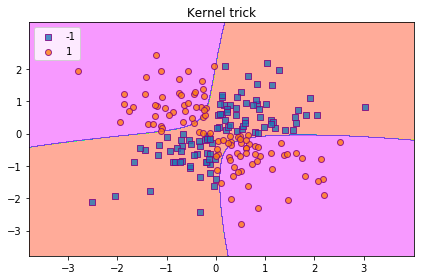

In [22]:
svm_xor = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm_xor.fit(X_xor, y_xor)
plot_classifier(
                X=X_xor,
                y=y_xor,
                classifier=svm_xor,
                cmap=plt.cm.gist_rainbow)
plt.title('Kernel trick')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Applying RBF kernel SVM to the Iris flower dataset

The below code for scatter plot considers the Iris dataset for `gamma`=0.20 and `C`=1.0. Increasing the value of $\gamma$ for the training samples, leads to a tighter and bumpier decision boundary. The value of $\gamma$ is invalid for a linear kernel in the scikit-learn implementation.


SVM RBF Classifier - Training accuracy: 0.9524

SVM RBF Classifier - Testing accuracy: 0.9778


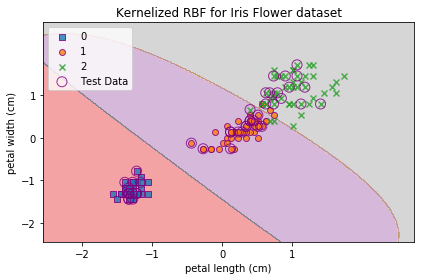

In [23]:
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm_rbf.fit(X_train_std, y_train)

# predict class labels for samples in normalized X_train
y_predicted_train_rbf = svm_rbf.predict(X_train_std)
print("\nSVM RBF Classifier - Training accuracy:",round(metrics.accuracy_score(y_train,y_predicted_train_rbf),4))

# predict class labels for samples in normalized X_test
y_predicted_test_rbf = svm_rbf.predict(X_test_std)
print("\nSVM RBF Classifier - Testing accuracy:",round(metrics.accuracy_score(y_test,y_predicted_test_rbf),4))

plot_classifier(
                X=X_combined_std,
                y=y_combined,
                classifier=svm_rbf,
                test_idx=range(105,150),
                cmap=plt.cm.Set1)
plt.title('Kernelized RBF for Iris Flower dataset')
plt.legend(loc='upper left')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.tight_layout()
plt.show()

As shown in the plot, chosing a relatively smaller $\gamma$ value resulted in a relatively soft decision boundary.

If we increase the $\gamma$ value to a relatively high value, we can observe that the deicision boundary around the classes 0 and 1 is much tighter.

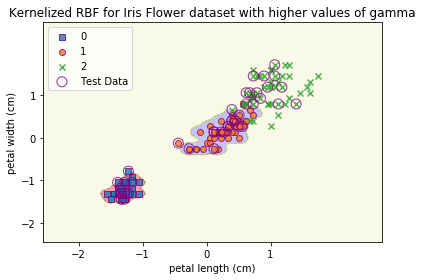

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)
plot_classifier(
                X=X_combined_std,
                y=y_combined,
                classifier=svm,
                test_idx=range(105,150),
                cmap=plt.cm.gist_stern)
plt.title('Kernelized RBF for Iris Flower dataset with higher values of gamma')
plt.legend(loc='upper left')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.tight_layout()
plt.show()

As can be seen from the plot above, the model fits the training dataset very well, resulting in a classifier with high generalization error on unseen data. This illustrates the fact that the parameter $\gamma$ has a critical role in controlling the overfitting.

### Applying _Polynomial_ kernel to the Iris flower dataset

Here we apply the *polynomial* kernel of degree 2 to the iris flower dataset and visualize the results as well as get the accuracy score. The $\gamma$ value is not relevant for a polynomial kernel.

In all cases, if we observe the accuracy over the test data has been consistent at `97.78%` for all the kernels used (_**Linear, RBF, Polynomial**_). This was possible as the data was normalized earlier. In case if the data is notmalized or not scaled then there might be a difference in the accuracy score for different kernels.


SVM Polynomial Classifier - Training accuracy: 0.9524

SVM Polynomial Classifier - Testing accuracy: 0.9778


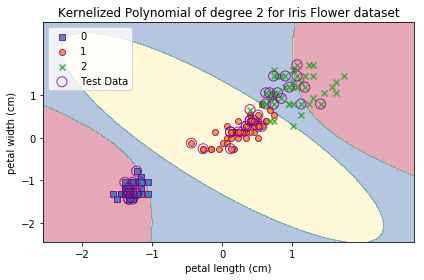

In [25]:
svm_poly = SVC(kernel='poly', random_state=1, degree=2, C=1.0)
svm_poly.fit(X_train_std, y_train)

# predict class labels for samples in normalized X_train
y_predicted_train_poly = svm_rbf.predict(X_train_std)
print("\nSVM Polynomial Classifier - Training accuracy:",round(metrics.accuracy_score(y_train,y_predicted_train_poly),4))

# predict class labels for samples in normalized X_test
y_predicted_test_poly = svm_rbf.predict(X_test_std)
print("\nSVM Polynomial Classifier - Testing accuracy:",round(metrics.accuracy_score(y_test,y_predicted_test_poly),4))

plot_classifier(
                X=X_combined_std,
                y=y_combined,
                classifier=svm_poly,
                test_idx=range(105,150),
                cmap=plt.cm.Spectral)
plt.title('Kernelized Polynomial of degree 2 for Iris Flower dataset')
plt.legend(loc='upper left')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.tight_layout()
plt.show()